In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./ml_source_files/heart_failure_clinical_records_dataset.csv')
df.head(2)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
y = df.DEATH_EVENT
x = df.drop('DEATH_EVENT', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC

In [15]:
from sklearn.metrics import classification_report, roc_auc_score

In [16]:
lr = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
xg = XGBRFClassifier()
rfc = RandomForestClassifier()

In [17]:
models = [lr, tree, knn, svc, xg, rfc]

In [18]:
for m in models:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    preds = m.predict_proba(x_test)[:,1]
    print(classification_report(y_test, pred))
    print(m.score(x_test, y_test))
    print(roc_auc_score(y_test, preds))
    print('='*100)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        39
           1       0.71      0.48      0.57        21

    accuracy                           0.75        60
   macro avg       0.74      0.69      0.70        60
weighted avg       0.74      0.75      0.74        60

0.75
0.7716727716727717
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.72      0.62      0.67        21

    accuracy                           0.78        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.78      0.78      0.78        60

0.7833333333333333
0.7454212454212454
              precision    recall  f1-score   support

           0       0.64      0.69      0.67        39
           1       0.33      0.29      0.31        21

    accuracy                           0.55        60
   macro avg       0.49      0.49      0.49        60
weighted avg

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(x_train)
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

In [20]:
for m in models:
    m.fit(x_train_std, y_train)
    pred = m.predict(x_test_std)
    preds = m.predict_proba(x_test_std)[:,1]
    print(classification_report(y_test, pred))
    print(m.score(x_test_std, y_test))
    print(roc_auc_score(y_test, preds))
    print('='*100)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.69      0.52      0.59        21

    accuracy                           0.75        60
   macro avg       0.73      0.70      0.71        60
weighted avg       0.74      0.75      0.74        60

0.75
0.7997557997557998
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        39
           1       0.67      0.48      0.56        21

    accuracy                           0.73        60
   macro avg       0.71      0.67      0.68        60
weighted avg       0.72      0.73      0.72        60

0.7333333333333333
0.673992673992674
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        39
           1       0.88      0.33      0.48        21

    accuracy                           0.75        60
   macro avg       0.80      0.65      0.66        60
weighted avg 

In [31]:
from sklearn.model_selection import GridSearchCV
param = {'n_estimators':[50, 100, 500], 'max_depth':[10, 20, 50],'min_samples_leaf':[2, 3, 5]}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=param, refit=True, verbose=False)
grid.fit(x_train_std, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 50],
                         'min_samples_leaf': [2, 3, 5],
                         'n_estimators': [50, 100, 500]},
             verbose=False)

In [32]:
grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}

In [33]:
grid.best_score_

0.8701241134751774

In [34]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf = 5, n_estimators = 50)

In [36]:
rfc.fit(x_train_std, y_train)
pred = rfc.predict(x_test_std)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.86      0.57      0.69        21

    accuracy                           0.82        60
   macro avg       0.83      0.76      0.78        60
weighted avg       0.82      0.82      0.81        60



In [39]:
df = pd.read_csv('./ml_source_files/vehicles.csv', index_col=0)
df.head(3)

id                                                url  region  \
0  7240372487  https://auburn.craigslist.org/ctd/d/auburn-uni...  auburn   
1  7240309422  https://auburn.craigslist.org/cto/d/auburn-201...  auburn   
2  7240224296  https://auburn.craigslist.org/cto/d/auburn-200...  auburn   

                      region_url  price    year manufacturer  \
0  https://auburn.craigslist.org  35990  2010.0    chevrolet   
1  https://auburn.craigslist.org   7500  2014.0      hyundai   
2  https://auburn.craigslist.org   4900  2006.0          bmw   

                  model  condition    cylinders  ... drive  size   type  \
0  corvette grand sport       good  8 cylinders  ...   rwd   NaN  other   
1                sonata  excellent  4 cylinders  ...   fwd   NaN  sedan   
2               x3 3.0i       good  6 cylinders  ...   NaN   NaN    SUV   

  paint_color                                          image_url  \
0         NaN  https://images.craigslist.org/00N0N_ipkbHVZYf4...   
1         NaN  https://images.craigslist.org/00s0s_gBHYmJ5o7y...   
2        blue  https://images.craigslist.org/00B0B_5zgEGWPOrt...   

                                         description state        lat  \
0  Carvana is the safer way to buy a car During t...    al  32.590000   
1  I'll move to another city and try to sell my c...    al  32.547500   
2  Clean 2006 BMW X3 3.0I.  Beautiful and rare Bl...    al  32.616807   

        long              posting_date  
0 -85.480000  2020-12-02T08:11:30-0600  
1 -85.468200  2020-12-02T02:11:50-0600  
2 -85.464149  2020-12-01T19:50:41-0600  

[3 rows x 25 columns]

In [40]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [41]:
df_drop = ['id', 'url', 'region_url', 'VIN', 'description', 'state', 'lat', 'long', 'posting_date']

In [42]:
df.drop(df_drop, axis=1, inplace=True)

In [44]:
df.drop('image_url', axis=1, inplace=True)

In [45]:
df.head(2)

region  price    year manufacturer                 model  condition  \
0  auburn  35990  2010.0    chevrolet  corvette grand sport       good   
1  auburn   7500  2014.0      hyundai                sonata  excellent   

     cylinders fuel  odometer title_status transmission drive size   type  \
0  8 cylinders  gas   32742.0        clean        other   rwd  NaN  other   
1  4 cylinders  gas   93600.0        clean    automatic   fwd  NaN  sedan   

  paint_color  
0         NaN  
1         NaN

In [46]:
df['age'] = 2022 - df['year']
df.drop('year', axis=1, inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        458213 non-null  object 
 1   price         458213 non-null  int64  
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  age           457163 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 55.9+ MB


<AxesSubplot:xlabel='count', ylabel='manufacturer'>

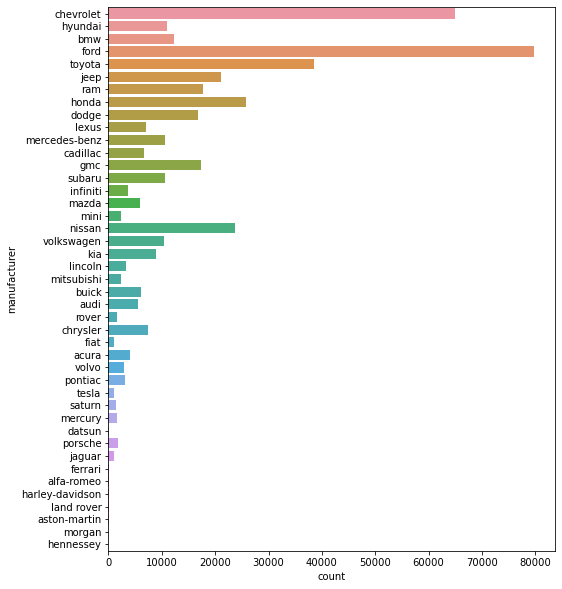

In [49]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='manufacturer', data=df)

<AxesSubplot:xlabel='count', ylabel='condition'>

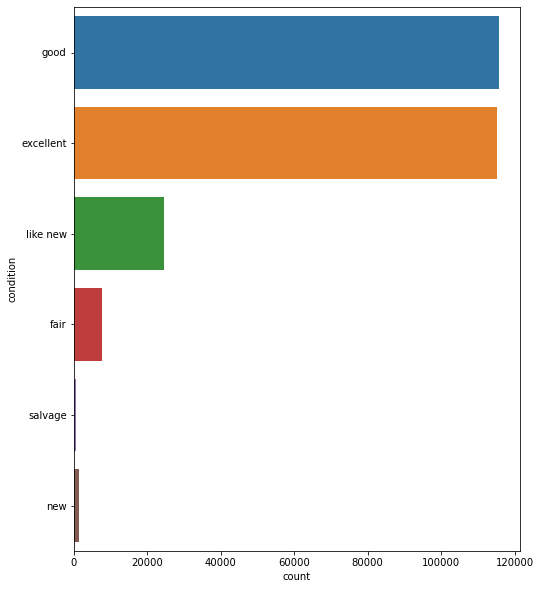

In [50]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='condition', data=df)

<AxesSubplot:xlabel='count', ylabel='fuel'>

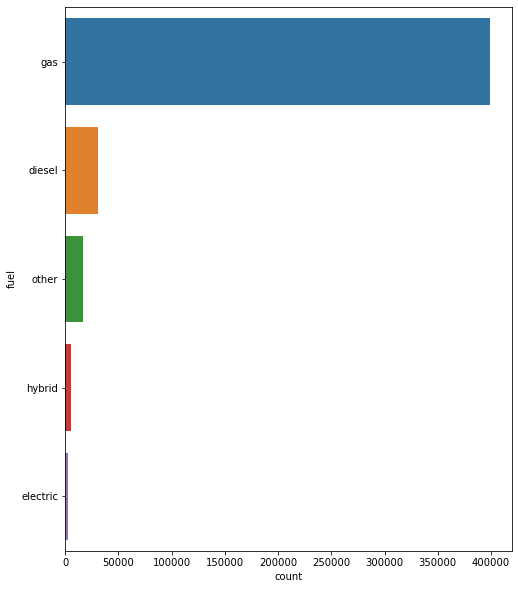

In [51]:
fig = plt.figure(figsize=(8,10))
sns.countplot(y='fuel', data=df)

In [52]:
count = df['paint_color'].fillna('others').value_counts()

In [54]:
count

others    140843
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
custom      8843
green       7631
brown       6028
yellow      2002
orange      1970
purple       768
Name: paint_color, dtype: int64

In [55]:
n = 7
others = count.index[n:]
others

Index(['custom', 'green', 'brown', 'yellow', 'orange', 'purple'], dtype='object')

In [56]:
df['paint_color'] = df['paint_color'].apply(lambda x:x if str(x) not in others else 'others')

In [58]:
df['paint_color'].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [59]:
df['paint_color'].isna().sum()

140843

In [60]:
df['paint_color'].fillna('others', inplace=True)

In [61]:
df['paint_color'].isna().sum()

0

In [64]:
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [65]:
count = df['manufacturer'].fillna('others').value_counts()
n = 20
others = count.index[n:]
df['manufacturer'] = df['paint_color'].apply(lambda x:x if str(x) not in others else 'others')

df['manufacturer'].fillna('others', inplace=True)
df['manufacturer'].isna().sum()

0

In [71]:
df['model'].value_counts().head(20)

f-150             8370
silverado 1500    5964
1500              4211
camry             4033
accord            3730
altima            3490
civic             3479
escape            3444
silverado         3090
explorer          2941
equinox           2923
corolla           2801
wrangler          2788
mustang           2652
malibu            2649
tacoma            2649
fusion            2608
grand cherokee    2574
focus             2491
grand caravan     2445
Name: model, dtype: int64

In [72]:
count = df['model'].fillna('others').value_counts()
n = 20
others = count.index[n:]
df['model'] = df['paint_color'].apply(lambda x:x if str(x) not in others else 'others')

df['model'].fillna('others', inplace=True)
df['model'].isna().sum()

0

<AxesSubplot:>

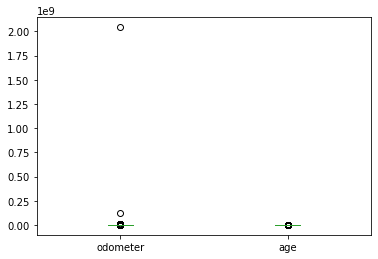

In [73]:
df[['odometer','age']].plot(kind='box')

In [74]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [77]:
df[['odometer','age']].isna().sum()

odometer    55303
age          1050
dtype: int64

In [87]:
df.dropna(subset=['odometer','age'], inplace=True)

In [88]:
df[['odometer','age']].isna().sum()

odometer    0
age         0
dtype: int64

In [89]:
def remove_outlier(s):
    qu25 = np.percentile(s, 25)
    qu75 = np.percentile(s, 75)
    iqr = qu75 - qu25
    low_limit = qu25 - iqr*1.5
    high_limit = qu75 - iqr*1.5
    return (s >= low_limit) & (s <= high_limit)

In [91]:
df['odometer'] = remove_outlier(df['odometer'])

In [96]:
def remove_outlier(s):
    qu25 = np.percentile(s, 25)
    qu75 = np.percentile(s, 75)
    iqr = qu75 - qu25
    low_limit = qu25 - iqr*1.5
    high_limit = qu75 - iqr*1.5
    return (s >= low_limit) & (s <= high_limit)
df['age'] = remove_outlier(df['age'])

In [97]:
df.isna().sum()

region               0
price                0
manufacturer         0
model                0
condition       159098
cylinders       135053
fuel              2444
odometer             0
title_status      1675
transmission      1724
drive            99604
size            275314
type             75308
paint_color          0
age                  0
dtype: int64

In [98]:
df_d = df.dropna()

In [99]:
df_d.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [100]:
df_one = pd.get_dummies(df_d)

In [103]:
df_one.head(2)

price  odometer    age  region_SF bay area  region_abilene  \
3   2000     False  False                   0               0   
4  19500     False  False                   0               0   

   region_akron / canton  region_albany  region_albuquerque  \
3                      0              0                   0   
4                      0              0                   0   

   region_altoona-johnstown  region_amarillo  ...  type_truck  type_van  \
3                         0                0  ...           0         0   
4                         0                0  ...           0         0   

   type_wagon  paint_color_black  paint_color_blue  paint_color_grey  \
3           0                  0                 1                 0   
4           0                  0                 1                 0   

   paint_color_others  paint_color_red  paint_color_silver  paint_color_white  
3                   0                0                   0                  0  
4                   0                0                   0                  0  

[2 rows x 476 columns]

In [ ]:
df

In [112]:
y = df_one['price']
x = df_one.drop('price', axis=1)

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [114]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [115]:
from sklearn.metrics import classification_report, r2_score, mean_squared_error

In [116]:
lr = LinearRegression()
rid = Ridge()
las = Lasso()

In [117]:
models = [lr, rid, las]

for m in models:
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print(m.__class__.__name__)
    print(mean_squared_error(y_test, pred))
    print(r2_score(y_test, pred))
    print('='*100)

LinearRegression
1519594588094.3403
-11130.822838031841
Ridge
1494179009949.7117
-10944.640473703366
Lasso
1519162663146.0027
-11127.658762533092


In [118]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

std.fit(x_train)
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

In [119]:
models = [lr, rid, las]

for m in models:
    m.fit(x_train_std, y_train)
    pred = m.predict(x_test_std)
    print(m.__class__.__name__)
    print(mean_squared_error(y_test, pred))
    print(r2_score(y_test, pred))
    print('='*100)

LinearRegression
1527956195860.5825
-11192.075975562193
Ridge
1519274402405.0735
-11128.477310878669
Lasso
1519312238224.374
-11128.754477986715
